In [205]:
import pandas as pd
import numpy as np
import os
from skimage import io
import seaborn as sns
import matplotlib as mlp


def dice(img1, img2):

#boolean data für dicescore nötig
    img1 = np.asarray(img1).astype(bool)
    img2 = np.asarray(img2).astype(bool)

#definiere gemeinsame elemente -> funktion vergleicht elementweise img1 mit img2
    commonelements = np.equal(img1, img2)
    elements1 = img1.shape[0]*img1.shape[1]
    elements2 = img2.shape[0]*img2.shape[1]
    d = 2* commonelements.sum()/(elements1 + elements2)
    return d

import os
def anwendungdice(input_path1,input_path2,dice_list):
    files1 = os.listdir(input_path1)
    files2 = os.listdir(input_path2)
    for o in range(len(files1)):
        file_path1 = os.path.join(input_path1,files1[o])
        file_path2 = os.path.join(input_path2,files2[o])
        d = dice(io.imread(file_path1),io.imread(file_path2))
        dice_list.append(d)

In [206]:

dice1_otsu = list()
anwendungdice('/Users/kira/Downloads/UNI/DataAnalysis/topic01_team03/Ergebnisse/Otsu/N2DH-GOWT1/','/Users/kira/Downloads/UNI/DataAnalysis/topic01_team03/BilderDaten/BilderDaten/N2DH-GOWT1/gt_binarized/', dice1_otsu)
dice1_otsu


[0.8978309631347656,
 0.9459800720214844,
 0.8924894332885742,
 0.8866996765136719,
 0.941624641418457,
 0.8975429534912109]

In [207]:
dice1_local = list()
anwendungdice('/Users/kira/Downloads/UNI/DataAnalysis/topic01_team03/Ergebnisse/local_thresholding/N2DH-GOWT1/','/Users/kira/Downloads/UNI/DataAnalysis/topic01_team03/BilderDaten/BilderDaten/N2DH-GOWT1/gt_binarized/',dice1_local)
dice1_local

[0.8117618560791016,
 0.8127117156982422,
 0.8174829483032227,
 0.7530574798583984,
 0.8052158355712891,
 0.8169879913330078]

In [208]:
dice1_multi = list()
anwendungdice('/Users/kira/Downloads/UNI/DataAnalysis/topic01_team03/Ergebnisse/twolevel_otsu/N2DH-GOWT1/','/Users/kira/Downloads/UNI/DataAnalysis/topic01_team03/BilderDaten/BilderDaten/N2DH-GOWT1/gt_binarized/',dice1_multi)
dice1_multi

[0.8983564376831055,
 0.9431095123291016,
 0.8150901794433594,
 0.8831081390380859,
 0.9399557113647461,
 0.9010858535766602]

In [209]:
dice1_thresholding1 = pd.DataFrame({'Otsu': dice1_otsu, 'Two-level': dice1_multi, 'Local' : dice1_local})
dice1_thresholding1

,Otsu,Two-level,Local
0,0.897831,0.898356,0.811762
1,0.945980,0.943110,0.812712
2,0.892489,0.815090,0.817483
3,0.886700,0.883108,0.753057
4,0.941625,0.939956,0.805216
5,0.897543,0.901086,0.816988


In [210]:
pd.DataFrame.mean(dice1_thresholding1)

Otsu         0.910361
Two-level    0.896784
Local        0.802870
dtype: float64

Text(0, 0.5, 'Dice Score')

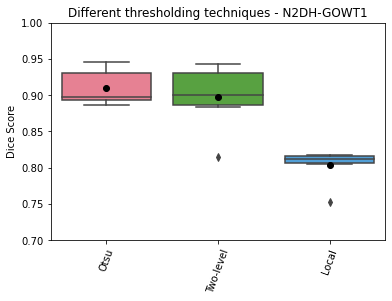

In [211]:
import matplotlib.pyplot as plt
dice1_thresholding1  = sns.boxplot(dice1_thresholding1, palette ='husl', showmeans = True, meanprops = {'marker':'o', 'markerfacecolor': 'black', 'markeredgecolor':'black', 'markersize': '6'})
dice1_thresholding1.set_xticklabels(dice1_thresholding1.get_xticklabels(), rotation = 70)
dice1_thresholding1.set_title('Different thresholding techniques - N2DH-GOWT1')
dice1_thresholding1.set_ylim(0.7,1)
dice1_thresholding1.set_ylabel('Dice Score')
